<a href="https://colab.research.google.com/github/Sambhav1207/Deep-Learning-Projects/blob/main/CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR-10 Object Recognition using ResNet50

In [1]:
!pip install kaggle

In [2]:
#Configure the Path of kaggle.json File
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Dataset API
!kaggle competitions download -c cifar-10

100% 715M/715M [00:35<00:00, 21.0MB/s]
100% 715M/715M [00:35<00:00, 20.8MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [6]:
#Extracting the Compressed Dataset
from zipfile import ZipFile
file_name = "cifar-10.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [7]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [8]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.5 MB/s eta 0:00:00


In [10]:
import py7zr
archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close

<bound method SevenZipFile.close of <py7zr.py7zr.SevenZipFile object at 0x7dd55434a110>>

In [11]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


##Importing the Dependencies

In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [13]:
filenames = os.listdir('train')

In [14]:
type(filenames)

list

In [15]:
len(filenames)

50000

In [17]:
print(filenames[0:5])
print(filenames[-5:])

['22743.png', '31865.png', '17372.png', '47204.png', '26266.png']
['32357.png', '30990.png', '37512.png', '46151.png', '11370.png']


##Labels Processing

In [18]:
labels_df = pd.read_csv('trainLabels.csv')

In [19]:
labels_df.shape

(50000, 2)

In [20]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
labels_df[labels_df['id'] == 22743]

,id,label
22742,22743,dog


In [26]:
labels_df.head(10)
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


All IDs are in order.

In [27]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [32]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [34]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [35]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


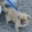

In [40]:
#Displaying Sample Image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('train/22743.png')
cv2_imshow(img)

In [41]:
labels_df[labels_df['id'] == 22743]

,id,label
22742,22743,dog


which matches